## Plowing Snow vs Potholes

- Ajayrangan Kasturirangan      (ak10196)\
  MS in Applied Urban Science and Informatics\
  Center for Urban Science + Progress\
  New York University Tandon School of Engineering


We all have heard this: 
Jonah Jameson: Who is Spider-Man? He's a criminal that's who he is! A vigilante! A public menace!

(From the movie Spiderman)

Well despite Jonah Jameson calling out Spiderman so harshly, we all love spiderman. But any New Yorker would relate to Jonah Jameson's enthusiasm when calling <b>potholes</b>: "A Public menace!" They are dangerous and ugly.

Why does New York have so many potholes? The reasons could be many. Ranging from construction, to traffic, rainfall, snowfall and much more. In this analysis, let us see how we can analyse the effect of plowing snow on potholes. 


<b>Lets talk science!</b>

Here we are going to study the effect of two actions. They are:
   1. <b><i>The Freezing and Thawing of Roads.</i></b>
   When temperatures are above freezing, rainwater or snowmelt will make its way into any small crack in the pavement. Then, as temperatures drop below freezing, the water within the cracked pavement begins to freeze and expand, causing the crack to expand and grow as well. Water expands approximately 10% when frozen, and has been estimated to exert over 30,000 psi as it expands. In other words, there is no stopping the freezing water from damaging pavements from the inside out. Finally, warming weather re-melts the ice, allowing the water to move deeper into the newly expanded crack, only to freeze and expand again during the next cycle. [Source 1](https://bitroads.com/about-us/blog/entryid/36/how-freeze-thaw-cycles-can-damage-asphalt-pavement#:~:text=How%20do%20freeze%2Dthaw%20cycles,expand%20and%20grow%20as%20well.)
   2. <b><i>Effect of salt on roads</i></b>
   Salt causes potholes by altering the temperature at which water freezes, basically at 15 degrees F instead of 32 degrees F. The plus side of that is the freeze-thaw cycles happen at a lower temperature, sparing roads that rarely experience temperatures that low. The negative is that those cycles still happen where air and ground get that cold or colder. In places where temperatures might vacillate above and below 15 degrees, usually in the dead of winter, that means those potholes are being created just when it’s hardest to repair them and it also results in water being stagnant for longet durations of time. [Source 2](https://www.pothole.info/2017/01/do-salt-and-snowplows-cause-potholes/#:~:text=Salt%20causes%20potholes%20by%20altering,rarely%20experience%20temperatures%20that%20low.)
 


In short:

    -We need to plow and salt roads, this keeps roads from being slippery in the winter and removes excess snow in the road that can cause potholes. 
    -We can't plow and salt them too much as well, because that would damage the asphalt and cause potholes again.
    -In an ideal world, we should try to strike a balance between both and we are going to estimate that balance.

The Hypothesis being:

There is an ideal amount of plows (Not too high, Not too low) that can be done on every street, that will minimise the number of potholes.

1. This project assumes when a road segment is plowed, it is plowed completely.
2. That all potholes present in the city are closed by the relevant agencies.
3. The average number of potholes in different roads that have the same number of plows can be treated as representative of all the roads in that category.

Let us start by importing the libraries needed for this analysis

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np 
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline
from scipy.optimize import minimize
from scipy.optimize import curve_fit

The Datasets required are as follows:

Datasets:
1. [Street Pothole Work Orders](https://data.cityofnewyork.us/Transportation/Street-Pothole-Work-Orders-Closed-Dataset-/x9wy-ing4)
The Street Pothole Work Orders data consists of closed street potholes inspected and repaired by the New York City Department of Transportation. The dataset includes the pothole’s location, the date it was reported, and date the report was completed.

2. [DSNY - Snow Priority Designation](https://data.cityofnewyork.us/City-Government/DSNY-Snow-Priority-Designation/sh4i-rsb8)
Citywide DSNY snow priority street designation for snow clearing operations.

3. [DSNY - PlowNYC Data](https://data.cityofnewyork.us/City-Government/DSNY-PlowNYC-Data/rmhc-afj9/data)
A table containing physical ID (a unique street segment identifier) and the date/time with which it was last associated with a GPS signal emitted by a DSNY snow clearing vehicle.
Filter applied: Only data recorded after 12-1-2018

Lets download and read the shapefiles of datasets 1 and 2 and process them

In [2]:
#Reading the data
df_pothole = gpd.read_file('geo_export_21e9ce4e-0aa3-40e1-81bc-3a5db4ed6a4a.shx')
df_snow_priority = gpd.read_file('geo_export_cdb3471c-6bb1-47e0-bd88-8db683053edc.shx')

In [3]:
#Modifying Time data
df_pothole['date_rptcl'] = pd.to_datetime(df_pothole['date_rptcl'])
df_pothole['Year'] = df_pothole['date_rptcl'].dt.year
df_pothole['Month'] = df_pothole['date_rptcl'].dt.month

Let us have a look at the datasets

In [4]:
df_pothole.head(3)

,defnum,initby,housenum,oft,onfacename,onprimname,frmprimnam,toprimname,specloc,boro,source,date_rptda,time_rptda,date_rptcl,time_rptcl,shape_leng,geometry,Year,Month
0,DB2004287021,CSC,None,318630377030377030,BEDFORD AV,BEDFORD AVENUE,BELT PARKWAY,BELT PARKWAY,SB ON BEDFORD_UNDERNEATH OVERPASS,B,CTZ,2004-10-13,00:00:00.000,2013-02-14,00:00:00.000,109.124234,"MULTILINESTRING ((-73.94381 40.58499, -73.9438...",2013,2
1,DB2006085009,CSC,None,306380308480308530,13 AV,13 AVENUE,38 STREET,39 STREET,I/F/O B16 BUS STOP,B,CTZ,2006-03-26,00:00:00.000,2014-10-11,00:00:00.000,260.495098,"LINESTRING (-73.98571 40.64119, -73.98629 40.6...",2014,10
2,DB2007166005,CSC,1688,342730355530375430,FULTON ST,FULTON STREET,LEWIS AVENUE,SCHENECTADY AVENUE,POTHOLE NEAR CURB I/F/O ADDRESS,B,CTZ,2007-06-15,00:00:00.000,2011-01-14,00:00:00.000,549.255973,"LINESTRING (-73.93487 40.67959, -73.93435 40.6...",2011,1


Now lets see the ranges

In [5]:
df_pothole.describe()

,shape_leng,Year,Month
count,339818.000000,339818.000000,339818.000000
mean,530.422412,2015.670697,5.429059
std,437.600252,3.541522,3.302424
min,9.821382,2010.000000,1.000000
25%,265.122545,2013.000000,3.000000
50%,459.769273,2016.000000,5.000000
75%,720.306960,2018.000000,8.000000
max,140472.811396,2022.000000,12.000000


In [6]:
df_snow_priority.head(3)

,borough,district,objectid,physicalid,roadwaytyp,segmentlen,shape__len,snowpriori,streetname,geometry
0,5,SI03,13403.0,15312.0,1.0,206.284835,0.000583,C,ROSSVILLE AVE,"LINESTRING (-74.21257 40.55340, -74.21278 40.5..."
1,5,SI03,13402.0,15311.0,1.0,126.244779,0.000357,C,ROSSVILLE AVE,"LINESTRING (-74.21278 40.55394, -74.21292 40.5..."
2,5,SI03,13401.0,15310.0,9.0,1002.846415,0.003289,C,W SHORE EXPRESSWAY EXIT 2 SB,"LINESTRING (-74.22107 40.52601, -74.21969 40.5..."


In [7]:
df_snow_priority.describe()

,objectid,physicalid,roadwaytyp,segmentlen,shape__len
count,110425.000000,110425.000000,110425.000000,110425.000000,110425.000000
mean,55213.000000,69354.079049,1.394739,344.734803,0.001093
std,31877.096075,49777.925313,1.593851,289.662593,0.000913
min,1.000000,3.000000,1.000000,1.859660,0.000005
25%,27607.000000,30954.000000,1.000000,174.912692,0.000556
50%,55213.000000,61304.000000,1.000000,263.481559,0.000887
75%,82819.000000,92875.000000,1.000000,459.700242,0.001430
max,110425.000000,197164.000000,13.000000,15093.619942,0.048580


We can see the data ranges from 2010 to 2022. Let us consider data from the year 2019 to keep dataset size small and have a quick and dirty analysis.

In [8]:
df_pothole = df_pothole[df_pothole['Year'] >= 2019].reset_index(drop=True)
df_pothole['Year'].unique()

array([2019, 2020, 2022, 2021])

In [9]:
df_pothole.shape

(83165, 19)

In [10]:
df_pothole['defnum'].nunique()

83165

<AxesSubplot:xlabel='Month', ylabel='Count'>

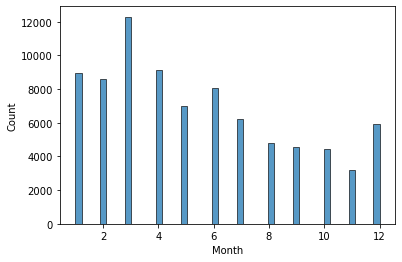

In [11]:
sns.histplot(data=df_pothole, x="Month")

    -As expected pothole cases tend to peak around march when the winter has ended.
    -We may see different effects in different types of roads

Lets combine both datasets to get a more granular view of the data

In [12]:
df_pothole['boro'].unique()

array(['B', 'M', 'Q', 'S', 'X'], dtype=object)

In [13]:
df_pothole['boro'] = df_pothole['boro'].map({'B':'Brooklyn'\
                                             ,'M':'Manhattan'\
                                             ,'Q':'Queens'\
                                             ,'S':'Staten Island'\
                                             ,'X':'Bronx'})

In [14]:
DF = gpd.sjoin(df_pothole,df_snow_priority,how='inner').reset_index(drop=True)
DF = DF.drop_duplicates(['defnum'])
DF = DF[['defnum','boro','roadwaytyp','shape__len','geometry','date_rptcl','Year', 'Month','snowpriori','physicalid']]
DF = DF.rename({'shape__len':'Length','date_rptcl':'Date'},axis=1)
DF.head()

,defnum,boro,roadwaytyp,Length,geometry,Date,Year,Month,snowpriori,physicalid
0,DB2018017027,Brooklyn,1.0,0.000936,"LINESTRING (-73.91042 40.66841, -73.91009 40.6...",2019-01-22,2019,1,C,71443.0
1,DB2018078001,Brooklyn,1.0,0.001004,"LINESTRING (-73.94687 40.62677, -73.94642 40.6...",2019-03-20,2019,3,C,39019.0
2,DB2019018010,Brooklyn,1.0,0.001004,"LINESTRING (-73.94687 40.62677, -73.94642 40.6...",2019-01-18,2019,1,C,39019.0
3,DB2018223005,Brooklyn,1.0,0.002443,"LINESTRING (-73.93533 40.60997, -73.93462 40.6...",2019-08-14,2019,8,C,66723.0
4,DB2022215029,Brooklyn,1.0,0.002443,"LINESTRING (-73.93533 40.60997, -73.93462 40.6...",2022-08-04,2022,8,C,66723.0


In [15]:
DF.shape

(71609, 10)

According to the data dictionary:
    	
Type of roadway. 1=Street; 2=Highway; 3=Bridge; 4=Tunnel; 5=Boardwalk; 6=Path/Trail; 7=Step Street; 8=Driveway; 9=Ramp; 10=Alley; 11=Unknown; 12=Non-physical street segment; 13=U-turn; 14=Ferry route

In [16]:
DF['roadwaytyp'] = DF['roadwaytyp'].map({1:'Street'\
                                         , 2:'Highway'\
                                         , 3:'Bridge'\
                                         , 4:'Tunnel'\
                                         , 5:'Boardwalk'\
                                         , 6:'Path/Trail'\
                                         , 7:'Step Street'\
                                         , 8:'Driveway'\
                                         , 9:'Ramp'\
                                         , 10:'Alley'\
                                         , 11:'Unknown'\
                                         , 12:'Non-physical street segment'
                                         , 13:'U-turn'\
                                         , 14:'Ferry route'})
DF['roadwaytyp'].unique()

array(['Street', 'Ramp', 'Bridge', 'Highway', 'U-turn', 'Step Street',
       'Tunnel'], dtype=object)

In [17]:
DF['roadwaytyp'].value_counts()

Street         69994
Highway          481
Ramp             468
Bridge           372
U-turn           191
Step Street       88
Tunnel            15
Name: roadwaytyp, dtype: int64

The street has the highest number of pothole orders which is likely a result of residents complaining about their neighbourhood street more than another place where they would only commute.

<AxesSubplot:xlabel='roadwaytyp'>

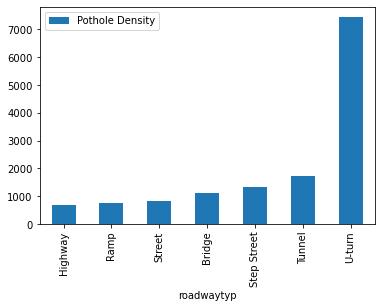

In [18]:
roadway = DF[['roadwaytyp','defnum','Length']].groupby('roadwaytyp')\
                                                  .agg({'defnum':'count','Length':'sum'})\
                                                  .rename({'defnum':'Count'},axis=1)
roadway['Pothole Density'] = roadway['Count']/roadway['Length']
roadway = roadway.sort_values('Pothole Density')

roadway['Pothole Density'].plot.bar(legend=True)

The results seem very intuitive, a ramp wouldn't have snow or rain stagnant for a long time, hence being the least likely to have potholes. on the other hand, U-turns and tunnels usually have slow moving traffic making it more likely to have more snow on the road.

Now let us view the same data from the angle of snow priority of the road stretch

From the data dictionary:
Snow priority designation: Critical Routes C, Sector Routes S, Haulster Routes H, Non-DSNY V.

Critical Routes: These routes comprise highways (entrances, exits, interchanges), arterial roadways, main, single and multi-lane travel thoroughfares, bus routes that contain emergency services and first responder facilities (hospitals, EMS, FDNY, NYPD) and schools.

Sector Routes: Designed to encompass all streets that are not classified as Critical Streets and are wide enough to accommodate a full-sized DSNY collection truck with a plow attached.

Narrow Routes(Haulster Routes): Designed to service dead-end and streets with a tight turning radius (either entering or exiting the street), and narrow streets that cannot be serviced with a DSNY collection truck, or a salt spreader with a plow attached. Narrow streets are serviced by a piece of equipment sometimes known as a Haulster, and residents may see this term in older documents.

In [19]:
DF['snowpriori'] = DF['snowpriori'].map({'C':'Critical Routes'\
                                         ,'S':'Sector Routes'\
                                         ,'H':'Haulster Routes'\
                                         ,'V':'Non-DSNY'})
DF['snowpriori'].unique()

array(['Critical Routes', 'Sector Routes', 'Haulster Routes', 'Non-DSNY'],
      dtype=object)

<AxesSubplot:>

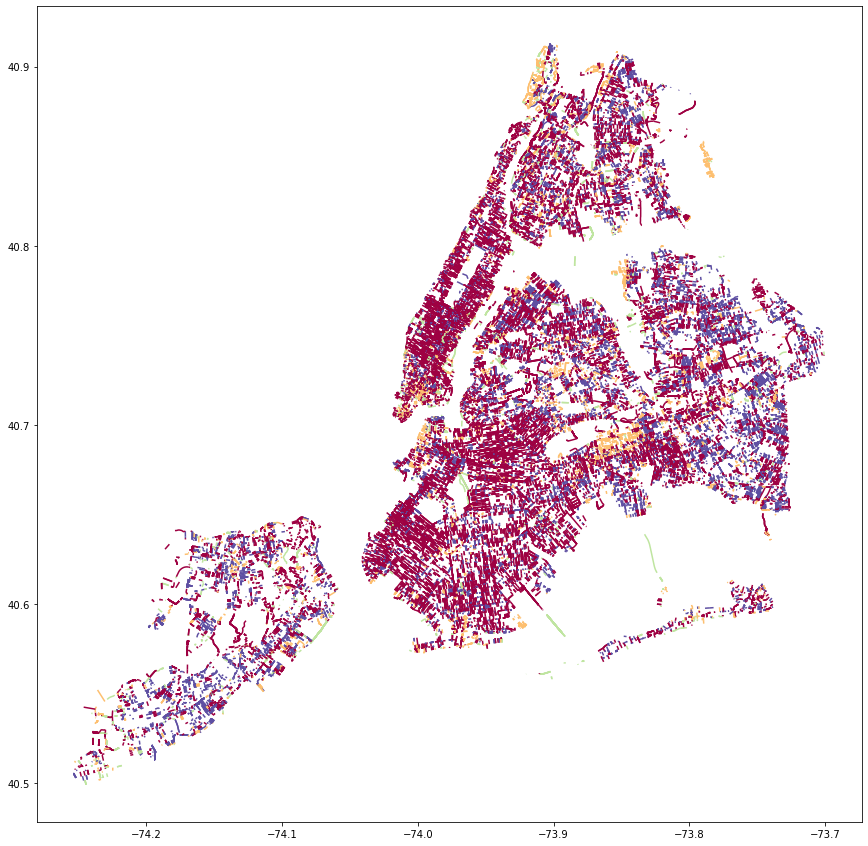

In [20]:
DF.plot(column='snowpriori',cmap='Spectral',figsize=(15,15),legend=False)

As we can see, most of the roads in the city are critical routes. We will most likely get a good result when sufficient data and critical routes seems promising, but let us see what we have further in the analysis.

<AxesSubplot:xlabel='snowpriori'>

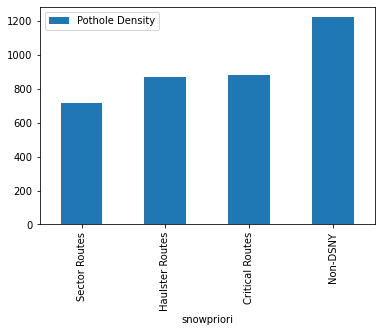

In [21]:
snow = DF[['snowpriori','defnum','Length']].groupby('snowpriori')\
                                                  .agg({'defnum':'count','Length':'sum'})\
                                                  .rename({'defnum':'Count'},axis=1)
snow['Pothole Density'] = snow['Count']/snow['Length']
snow = snow.sort_values('Pothole Density')

snow['Pothole Density'].plot.bar(legend=True)

Let us remove non-DSNY from the data to get a more clear relation between plowing and plotholes

In [22]:
DF = DF[DF['snowpriori'] != 'Non-DSNY']

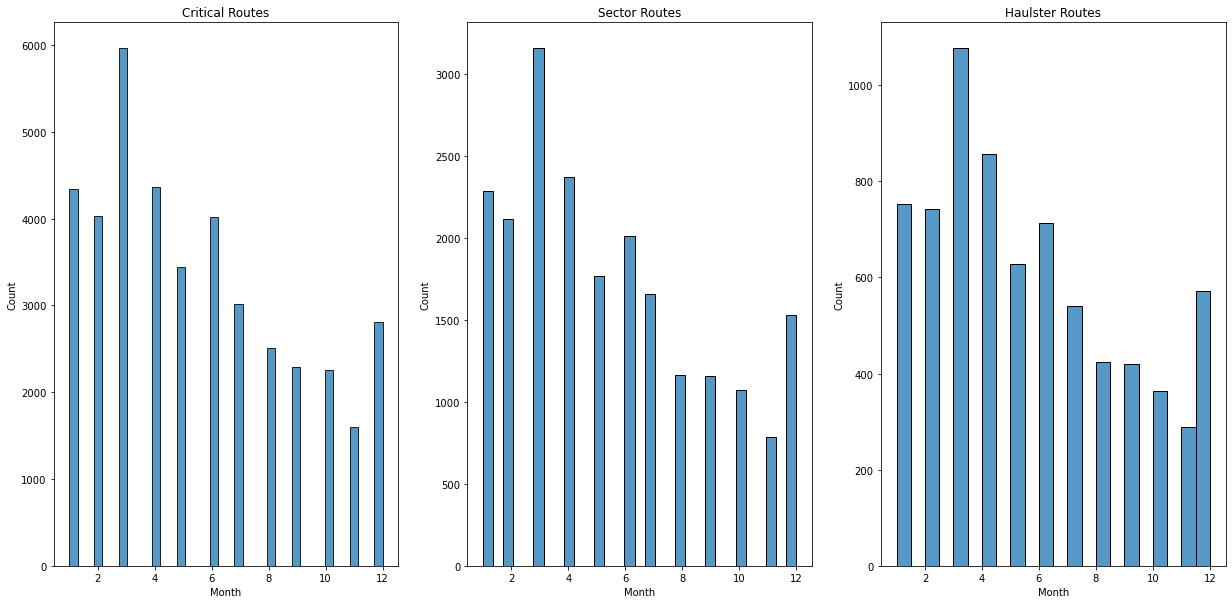

In [23]:
fig,axs = plt.subplots(1,3,figsize=(21,10))
for n,i in enumerate(DF['snowpriori'].unique()):
    temp = DF[DF['snowpriori'] == i]
    sns.histplot(data = temp,x='Month',ax=axs[n])
    axs[n].set_title(i)

As we can see, critical routes has more pothole cases > sector routes > haulster routes but the distribution seems the same, hence we can assume the quality of equipment doesn't have any effect on the long term damaging effects on the road. 

How could we better the situation? Could it be as a result of the frequency of plowing the roads?

Now let us dive into the frequency of cleaning the road using the dataset 3

In [24]:
PlowNYC = pd.read_csv('DSNY_-_PlowNYC_Data.csv') #Only Data after 1-Dec 2018 to understand the potholes since the year 2019

PHYSICAL_ID	A unique ID assigned to intersection to intersection stretches of a street. This unique ID is the key that can be used to join PlowNYC data to NYC Street Centerline (CSCL) data.

LAST_VISITED	The date and time when the street segment was last associated with a GPS signal emitted from a DSNY vehicle assigned to clear snow.

SNAPSHOT	The date and time the record was generated. 

Lets clean this data and use it to understand the frequency at which roads are plowed and the respective number of potholes closed in those roads.

In [25]:
PlowNYC = PlowNYC.dropna()\
                 .drop_duplicates('LAST_VISITED')\
                 .reset_index(drop=True)
PlowNYC.head()

,PHYSICAL_ID,LAST_VISITED,SNAPSHOT
0,69823,01/13/2019 08:29:00 AM,01/13/2019 08:37:07 AM
1,67146,01/13/2019 08:06:00 AM,01/13/2019 08:37:07 AM
2,17931,01/13/2019 08:02:00 AM,01/13/2019 08:37:07 AM
3,17939,01/13/2019 08:01:00 AM,01/13/2019 08:37:07 AM
4,67145,01/13/2019 08:16:00 AM,01/13/2019 08:37:07 AM


In [26]:
PlowNYC_physical = PlowNYC.groupby('PHYSICAL_ID').agg({'LAST_VISITED':'count'})
PlowNYC_physical.head()

,LAST_VISITED
PHYSICAL_ID,
3,162
33,1
98,1
137,37
138,2


In [27]:
DF_physical = DF.groupby(['physicalid'])\
                .agg({'defnum':'count'})
DF_physical.head()

,defnum
physicalid,
6.0,2
14.0,12
29.0,2
46.0,7
47.0,1


In [28]:
index = df_snow_priority[df_snow_priority['snowpriori'] != 'V']
index= index[['physicalid','snowpriori','roadwaytyp','shape__len']].set_index('physicalid',drop=True)
index['snowpriori'] = index['snowpriori'].map({'C':'Critical Routes'\
                                         ,'S':'Sector Routes'\
                                         ,'H':'Haulster Routes'})
index['roadwaytyp'] = index['roadwaytyp'].map({1:'Street'\
                                         , 2:'Highway'\
                                         , 3:'Bridge'\
                                         , 4:'Tunnel'\
                                         , 5:'Boardwalk'\
                                         , 6:'Path/Trail'\
                                         , 7:'Step Street'\
                                         , 8:'Driveway'\
                                         , 9:'Ramp'\
                                         , 10:'Alley'\
                                         , 11:'Unknown'\
                                         , 12:'Non-physical street segment'
                                         , 13:'U-turn'\
                                         , 14:'Ferry route'})
index.head()

,snowpriori,roadwaytyp,shape__len
physicalid,,,
15312.0,Critical Routes,Street,0.000583
15311.0,Critical Routes,Street,0.000357
15310.0,Critical Routes,Ramp,0.003289
15309.0,Critical Routes,Ramp,0.002490
15308.0,Critical Routes,Ramp,0.001023


Now lets perform an outer join of all the datasets and analyze the plow count vs pot holes for each category

In [29]:
Merged_df = index.merge(DF_physical,how='outer',left_index=True, right_index=True)\
                 .merge(PlowNYC_physical,how='outer',left_index=True, right_index=True)\
                 .rename({'defnum':'Pot Holes Closed','LAST_VISITED':'Plow Count'},axis=1)
Merged_df = Merged_df[~Merged_df['snowpriori'].isna()].fillna(0)
Merged_df.shape

(99077, 5)

In [30]:
Merged_df.head(3)

,snowpriori,roadwaytyp,shape__len,Pot Holes Closed,Plow Count
3.0,Critical Routes,Street,0.000759,0.0,162.0
5.0,Critical Routes,Street,0.000771,0.0,0.0
6.0,Critical Routes,Street,0.000834,2.0,0.0


Create a column for Pot Hole density and plow count density

In [31]:
Merged_df['Pot Hole Density'] = Merged_df['Pot Holes Closed']/Merged_df['shape__len']
#/Merged_df['shape__len']

Now it is time to view the data by different cuts on a graph

First by the type of road

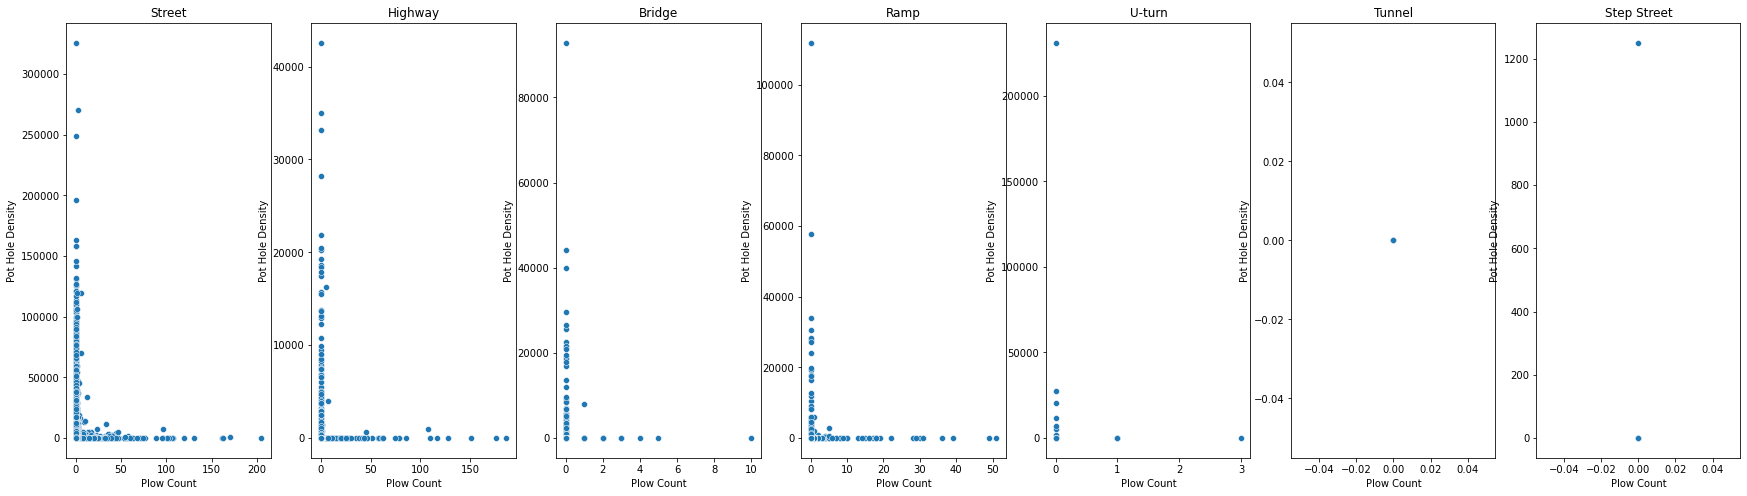

In [32]:
fig,axs = plt.subplots(1,len(Merged_df['roadwaytyp'].unique()),figsize=(30,8))

for k,j in enumerate(Merged_df['roadwaytyp'].unique()):
    temp = Merged_df[Merged_df['roadwaytyp'] == j]
    temp = temp[temp['roadwaytyp']==j]
    sns.scatterplot(data=temp,x = 'Plow Count',y='Pot Hole Density',ax=axs[k])
    axs[k].set_title(j)

Now by the type of Snow Priority

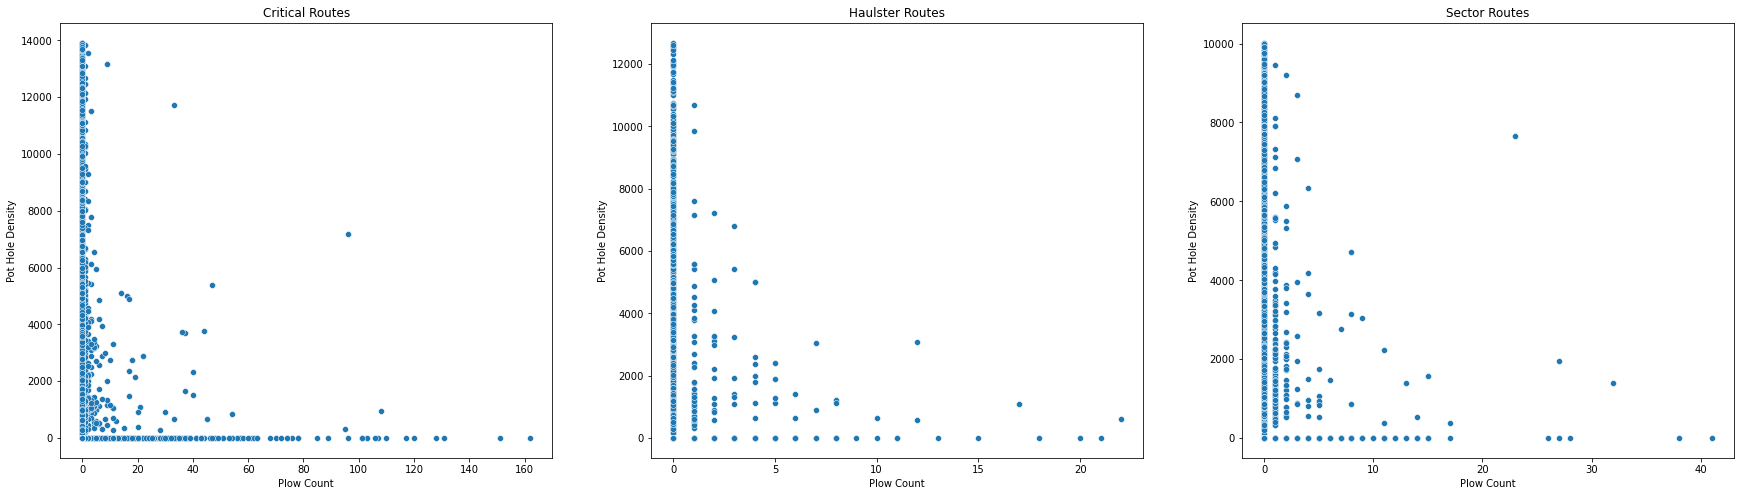

In [33]:
fig,axs = plt.subplots(1,len(Merged_df['snowpriori'].unique()),figsize=(30,8))

for k,j in enumerate(Merged_df['snowpriori'].unique()):
    temp = Merged_df[Merged_df['snowpriori'] == j]
    temp = temp[temp['snowpriori']==j]
    temp = temp.drop_duplicates()
    OutlierX = np.percentile(temp['Plow Count'].unique(),95)
    OutlierY = np.percentile(temp['Pot Hole Density'].unique(),95)
    
    temp = temp[temp['Plow Count']<=OutlierX]
    temp = temp[temp['Pot Hole Density']<=OutlierY]
    
    sns.scatterplot(data=temp,x = 'Plow Count',y='Pot Hole Density',ax=axs[k])
    axs[k].set_title(j)

Clearly we have only enough data for streets to make any inference, so let us focus only on streets and find a balance for the right limit of plowing to help keep roads from deteoriating and safe. For this we need to minimise number of potholes reported with respect to number of times the road was plowed using the method of least squares.

Since we are expecting number of potholes to increase with increase in plow count as well as well as increase with low plow count, let us describe the function we want to achieve as a second degree polynomial. 

i.e y=ax^2+bx+c

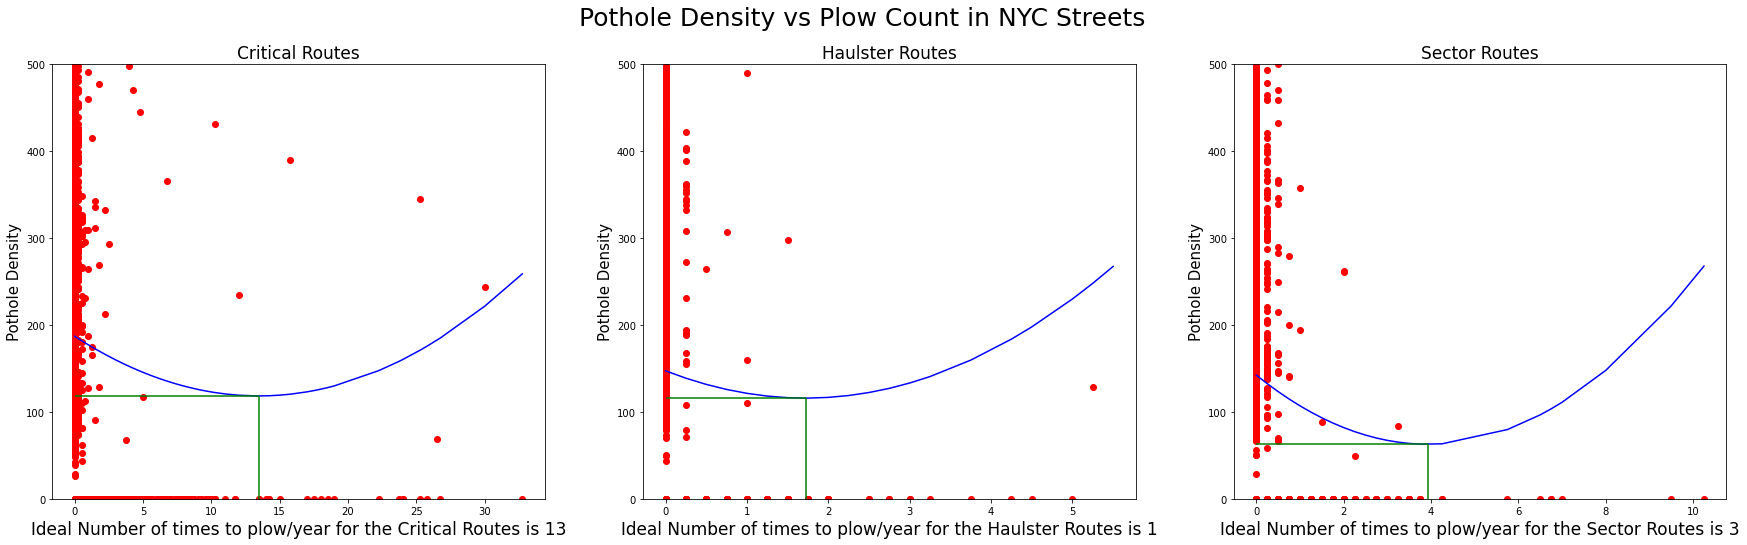

In [34]:
Street_df = Merged_df[Merged_df['roadwaytyp'] == 'Street']

#Degree 2 polynomial
def func(x, a, b, c):
    return a*(x**2)+b*(x**1)+c

#Function to fit curve,plot and find minima
fig,axs = plt.subplots(1,len(Street_df['snowpriori'].unique()),figsize=(30,8))

ideal = []
for k,j in enumerate(Street_df['snowpriori'].unique()):
    
    #Filter relevant data
    temp = Street_df[Street_df['snowpriori'] == j]
    temp = temp[temp['snowpriori']==j]
    temp = temp.drop_duplicates()
    OutlierX = np.percentile(temp['Plow Count'].unique(),95)
    OutlierY = np.percentile(temp['Pot Hole Density'].unique(),95)
    temp = temp[(temp['Plow Count']<=OutlierX)]
    temp = temp[(temp['Pot Hole Density']<=OutlierY)]
    
    #Fit the curve and account for number of years
    X = (np.array(temp['Plow Count'].sort_values())+0.0000001)/df_pothole['Year'].nunique()
    y = (np.array(temp['Pot Hole Density'])+0.0000001)/df_pothole['Year'].nunique()
    popt, pcov = curve_fit(func, X, y)
    
    #Plot the points and the curve
    axs[k].scatter(X, y, color='red')
    axs[k].plot(X, func(X, *popt), 'blue',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    axs[k].set_title(j,fontsize=17)
    plt.suptitle("Pothole Density vs Plow Count in NYC Streets",fontsize=25)
    
    #Find the minima
    fun = lambda x: (popt[0]*(x**2)+popt[1]*(x**1)+popt[2])
    x0 = np.linspace(1,100,1)
    res = minimize(fun, x0)
    axs[k].set_ylabel('Pothole Density',fontsize=15)
    
    if res.x[0] > 0:
        axs[k].set_xlabel("Ideal Number of times to plow/year for the "+j+" is "+str(int(res.x[0])),fontsize=17)
        axs[k].vlines(res.x[0],ymin=0,ymax=fun(res.x[0]),color='g')
        axs[k].hlines(fun(res.x[0]),xmin=0,xmax=res.x[0],color='g')
        axs[k].set_ylim(0,500)
        ideal.append(res.x[0])
    else:
        axs[k].set_xlabel("Curve doesn't have positive minima",fontsize=17)
        ideal.append(0)
        

We might not see a positive minima when we don't have enough data. In this example, we have used minimal data to have quick computation.

An important factor to note is it is not ideal to limit the number of times we plow the road because of this. It will have to be done in accordance with the need and requirement according to the weather. But if we exceed the ideal number of times to plow or dont plow the roads enough to reach the ideal value, authorities can prepare to anticipate a lot more potholes in those sections. This could help initiate pre-emptive measures to serve the city in a better way during the aftermath.

Will this solve the <b>public menace</b>? We can't conclude. But given the data following the hypothesis in a case with enough data, it is encouraging to further work on this.